In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Titanic-Dataset.csv")

Subset the Dataframe

In [5]:
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset_df = subset_df[subset_df['Pclass'] == 1]

mean = subset_df['Fare'].mean()
median = subset_df['Fare'].median()
max = subset_df['Fare'].max()
min = subset_df['Fare'].min()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Maximum: {max}")
print(f"Minimum: {min}")



Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0


Hande Missing value

In [6]:
null_count_age = subset_df['Age'].isnull().sum()
print(f"Missing values in 'Age': {null_count_age}")

subset_df = subset_df.dropna(subset =['Age'])
print(f"Updated row: {len(subset_df)}")

Missing values in 'Age': 30
Updated row: 186


One-hotEnconding

In [7]:
df_encoded = pd.get_dummies(df, columns =['Embarked'], prefix = 'Embarked',drop_first = False)
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Compare survival Rates by Gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-8-3e90d24336f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index,  y=gender_survival.values, palette = 'viridis')


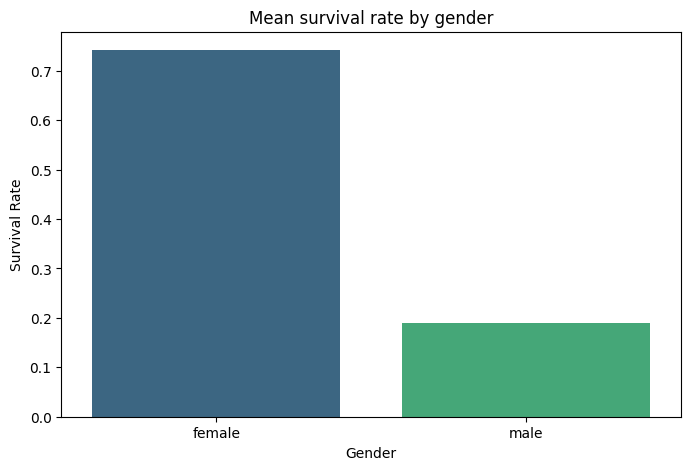

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_survival = df.groupby('Sex')['Survived'].mean()

print(gender_survival)

plt.figure(figsize = [8,5])
sns.barplot(x=gender_survival.index,  y=gender_survival.values, palette = 'viridis')
plt.title('Mean survival rate by gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

Survival Rate by part of Embarkation

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<ipython-input-9-9d6b3e64b0ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_survival.index, y =port_survival.values, palette='coolwarm')


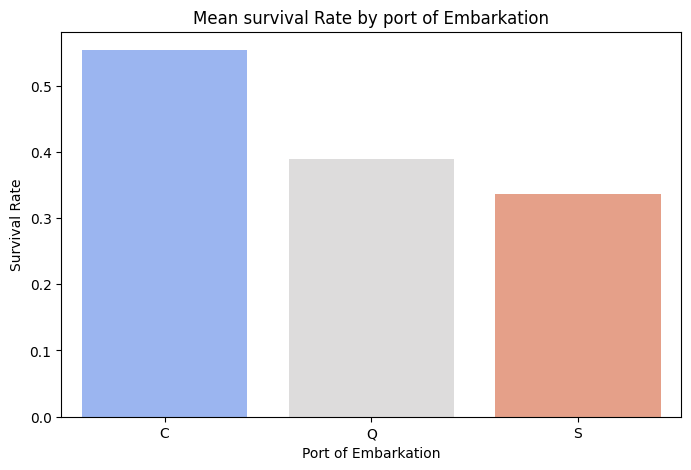

In [9]:
port_survival = df.groupby('Embarked')['Survived'].mean()

print(port_survival)

plt.figure(figsize = (8,5))
sns.barplot(x=port_survival.index, y =port_survival.values, palette='coolwarm')
plt.title('Mean survival Rate by port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.show()


Survival Rates by age group class

<ipython-input-10-1093504f1df6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()



Problem 6: 
Mean Survival Rates by Age Group and Pclass: 
Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


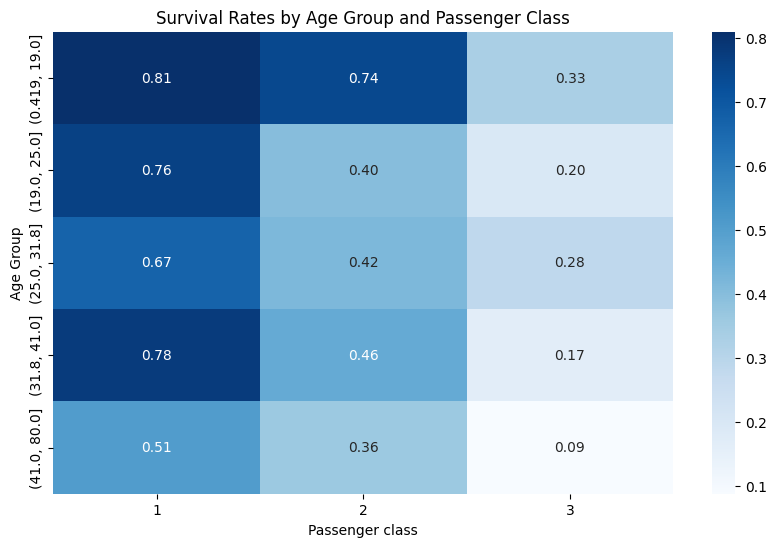

In [10]:
df['AgeGroup'] = pd.qcut(df['Age'], q=5)

age_class_survival = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()

print("\nProblem 6: ")
print("Mean Survival Rates by Age Group and Pclass: ")
print(age_class_survival)

plt.figure(figsize = (10,6))
sns.heatmap(age_class_survival, annot = True, cmap = 'Blues', fmt ='.2f')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylabel('Age Group')
plt.xlabel('Passenger class')
plt.show()
